# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
! pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
path = os.path.join("output_data", "cities.csv")
output_data_file = path

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# record counter
records = 0
# max calls set at 50
max_calls = 50
# set counter
sets = 1

In [5]:
# Base url, parameters, and unit conversion
base_url = 'http://api.openweathermap.org/data/2.5/weather'
units = 'imperial'

params = {'appid': api_key,'units': units}

In [6]:
# Create DF to iterrows later
cities_df = pd.DataFrame({'City': [city for city in cities]})

In [7]:
# print "Beginning Data Retrieval" header
print("-----------------------------------------------------------")
print("Beginning Data Retrieval")
print("-----------------------------------------------------------")

# iterates through rows of dataset
for index, row in cities_df.iterrows():
    if records == max_calls:
        sets += 1
        records = 0
    
    # Add cities to parameters
    params['q'] = row['City']
    # Assign parameters to variables for easy substitution in url
    a, u, q = params.values()
    
    # Formula for full url
    target_url = base_url + '?' + 'appid=' + a + '&units=' + u + '&q=' + q.replace(" ", "+")
        
    # displays record status
    print("Processing Record " + str(records) + " of Set " + str(sets) + " | " + q)
       
    # try and except for cities not found
    try:
        response = requests.get(base_url, params=params).json()
        
    except:
        print(q + ": City not found, Skipping...")
        
    try:
        cities_df.set_value(index, 'Country', response['sys']['country'])
        cities_df.set_value(index, 'Cloudiness', response['clouds']['all'])
        cities_df.set_value(index, 'Date', int(response['dt']))
        cities_df.set_value(index, 'Humidity', response['main']['humidity'])
        cities_df.set_value(index, 'Lat', response['coord']['lat'])
        cities_df.set_value(index, 'Lng', response['coord']['lon'])
        cities_df.set_value(index, 'Max Temp', response['main']['temp_max'])
        cities_df.set_value(index, 'Wind Speed', response['wind']['speed'])

    except:
        print(q + ": Missing Data...")
        
    records += 1
        
#Print "Data Retrieval Complete" footer
print("-----------------------------------------------------------")   
print("Data Retrieval Complete")
print("-----------------------------------------------------------")

-----------------------------------------------------------
Beginning Data Retrieval
-----------------------------------------------------------
Processing Record 0 of Set 1 | sambava


C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Justin\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Justin\Anaconda3

Processing Record 1 of Set 1 | tokmak
Processing Record 2 of Set 1 | shimanovsk
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | tuggurt
tuggurt: Missing Data...
Processing Record 8 of Set 1 | warqla
warqla: Missing Data...
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | esperance
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | nanortalik
Processing Record 13 of Set 1 | verkhoyansk
Processing Record 14 of Set 1 | portland
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | antalaha
Processing Record 18 of Set 1 | quatre cocos
Processing Record 19 of Set 1 | qunduz
Processing Record 20 of Set 1 | derbent
Processing Record 21 of Set 1 | pevek
Processing Record 22 of Set 1 | arraial do cabo
Processing Record 23 of Set 1 | galgani
galgani: Missing D

Processing Record 39 of Set 4 | chuy
Processing Record 40 of Set 4 | itoman
Processing Record 41 of Set 4 | tecoanapa
Processing Record 42 of Set 4 | koumac
Processing Record 43 of Set 4 | lerwick
Processing Record 44 of Set 4 | san patricio
Processing Record 45 of Set 4 | la palma
Processing Record 46 of Set 4 | amderma
amderma: Missing Data...
Processing Record 47 of Set 4 | kaeo
Processing Record 48 of Set 4 | abnub
Processing Record 49 of Set 4 | bilibino
Processing Record 0 of Set 5 | comodoro rivadavia
Processing Record 1 of Set 5 | attawapiskat
attawapiskat: Missing Data...
Processing Record 2 of Set 5 | muros
Processing Record 3 of Set 5 | piste
Processing Record 4 of Set 5 | lolua
lolua: Missing Data...
Processing Record 5 of Set 5 | kuche
kuche: Missing Data...
Processing Record 6 of Set 5 | mogzon
Processing Record 7 of Set 5 | korla
Processing Record 8 of Set 5 | shelburne
Processing Record 9 of Set 5 | east angus
Processing Record 10 of Set 5 | hobyo
Processing Record 11 o

Processing Record 28 of Set 8 | wuchang
Processing Record 29 of Set 8 | nome
Processing Record 30 of Set 8 | sao joao da barra
Processing Record 31 of Set 8 | anadyr
Processing Record 32 of Set 8 | tungkang
tungkang: Missing Data...
Processing Record 33 of Set 8 | ancud
Processing Record 34 of Set 8 | tura
Processing Record 35 of Set 8 | coquimbo
Processing Record 36 of Set 8 | union
Processing Record 37 of Set 8 | kununurra
Processing Record 38 of Set 8 | pho chai
Processing Record 39 of Set 8 | kahului
Processing Record 40 of Set 8 | kazachinskoye
Processing Record 41 of Set 8 | cumaribo
cumaribo: Missing Data...
Processing Record 42 of Set 8 | tahta
Processing Record 43 of Set 8 | broken hill
Processing Record 44 of Set 8 | beloha
Processing Record 45 of Set 8 | dingle
Processing Record 46 of Set 8 | novobirilyussy
Processing Record 47 of Set 8 | kakonko
Processing Record 48 of Set 8 | biu
Processing Record 49 of Set 8 | tshikapa
Processing Record 0 of Set 9 | ahvaz
Processing Recor

mrirt: Missing Data...
Processing Record 15 of Set 12 | veraval
Processing Record 16 of Set 12 | cabatuan
Processing Record 17 of Set 12 | mountain home
Processing Record 18 of Set 12 | ajaccio
Processing Record 19 of Set 12 | fakel
Processing Record 20 of Set 12 | kamenka
Processing Record 21 of Set 12 | ibb
Processing Record 22 of Set 12 | aswan
Processing Record 23 of Set 12 | havelock
Processing Record 24 of Set 12 | louisbourg
louisbourg: Missing Data...
Processing Record 25 of Set 12 | praia
Processing Record 26 of Set 12 | kalayaan
Processing Record 27 of Set 12 | haibowan
haibowan: Missing Data...
Processing Record 28 of Set 12 | alamosa
Processing Record 29 of Set 12 | kulhudhuffushi
Processing Record 30 of Set 12 | shimoda
Processing Record 31 of Set 12 | karpogory
Processing Record 32 of Set 12 | pokosnoye
Processing Record 33 of Set 12 | nelspruit
Processing Record 34 of Set 12 | suda
Processing Record 35 of Set 12 | qostanay
Processing Record 36 of Set 12 | alakurtti
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# drop rows missing information
cities_df_clean = cities_df.dropna(how="any")
# ensure row count consistency
cities_df_clean.count()

City          553
Country       553
Cloudiness    553
Date          553
Humidity      553
Lat           553
Lng           553
Max Temp      553
Wind Speed    553
dtype: int64

In [9]:
# export as csv
save_path = os.path.join("..", "Resources", "city_weather.csv")
cities_df_clean.to_csv(save_path)
cities_df_clean.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sambava,MG,0.0,1.581479e+09,97.0,-14.27,50.17,68.00,2.28
1,tokmak,UA,100.0,1.581479e+09,97.0,47.25,35.71,35.51,17.67
2,shimanovsk,RU,92.0,1.581479e+09,91.0,52.00,127.70,11.64,5.44
3,ushuaia,AR,75.0,1.581479e+09,71.0,-54.80,-68.30,53.60,11.41
4,albany,US,90.0,1.581479e+09,69.0,42.60,-73.97,35.60,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [10]:
# set variable for today's date
today = datetime.datetime.today().strftime("%m/%d/%Y")

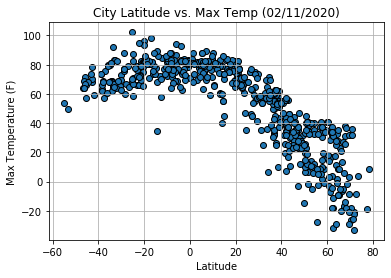

In [11]:
# Scatter plot 1 - Max Temp
fig, ax = plt.subplots()
ax.scatter(cities_df_clean["Lat"], cities_df_clean["Max Temp"], marker="o", edgecolors="black");
ax.set(xlabel="Latitude", ylabel="Max Temperature (F)", title=f"City Latitude vs. Max Temp ({today})");
ax.grid();

#### Latitude vs. Humidity Plot

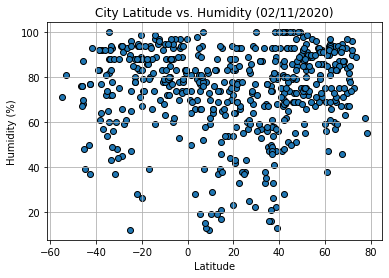

In [12]:
# Scatter plot 2 - Humidity
fig2, ax2 = plt.subplots()
ax2.scatter(cities_df_clean["Lat"], cities_df_clean["Humidity"], marker="o", edgecolors="black");
ax2.set(xlabel="Latitude", ylabel="Humidity (%)", title=f"City Latitude vs. Humidity ({today})");
ax2.grid();

#### Latitude vs. Cloudiness Plot

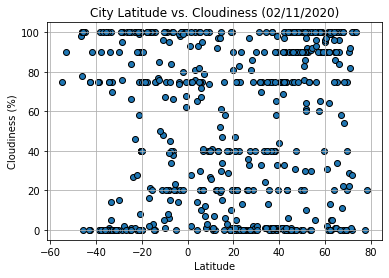

In [13]:
# Scatter plot 3 - Cloudiness
fig3, ax3 = plt.subplots()
ax3.scatter(cities_df_clean["Lat"], cities_df_clean["Cloudiness"], marker="o", edgecolors="black");
ax3.set(xlabel="Latitude", ylabel="Cloudiness (%)", title=f"City Latitude vs. Cloudiness ({today})");
ax3.grid();

#### Latitude vs. Wind Speed Plot

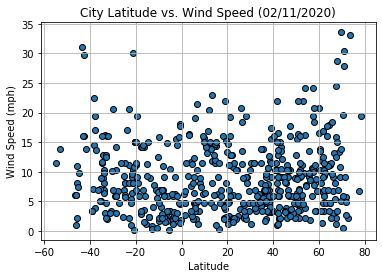

In [14]:
# Scatter plot 4 - Wind Speed
fig4, ax4 = plt.subplots()
ax4.scatter(cities_df_clean["Lat"], cities_df_clean["Wind Speed"], marker="o", edgecolors="black");
ax4.set(xlabel="Latitude", ylabel="Wind Speed (mph)", title=f"City Latitude vs. Wind Speed ({today})");
ax4.grid();